In [80]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [81]:
# Files to load
city_data_to_load='Resources/city_data.csv'
ride_data_to_load='Resources/ride_data.csv'

In [82]:
# Read the city data file and store it in a pandas DataFrame
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [83]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12


In [84]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [85]:
# Get the columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [86]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [87]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [88]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [89]:
sum(city_data_df["type"]=="Suburban")

36

In [90]:
sum(city_data_df["type"]=="Rural")

18

In [91]:
# Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [92]:
# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [93]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [94]:
ride_data_df['ride_id'] = ride_data_df['ride_id'].astype(np.int64)

In [95]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [96]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df,how='left',on=['city','city'])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban


In [97]:
# Create the Urban city DataFrame
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban


In [98]:
# Create the Suburban city DataFrame
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/19 3:08,27.79,6653620000000,11,Suburban
1626,East Kentstad,4/7/19 19:44,18.75,6575960000000,20,Suburban
1627,Lake Omar,1/17/19 21:33,21.71,966912000000,22,Suburban
1628,Myersshire,2/27/19 17:38,17.10,5706770000000,19,Suburban
1629,West Hannah,4/19/19 1:06,37.78,2273050000000,12,Suburban


In [99]:
# Create a Rural city DataFrame
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/19 11:13,43.22,1076080000000,9,Rural
2251,North Holly,2/2/19 14:54,12.42,1985260000000,8,Rural
2252,Michaelberg,3/27/19 18:27,54.85,4421840000000,6,Rural
2253,Lake Latoyabury,2/23/19 21:12,47.90,3269650000000,2,Rural
2254,Lake Latoyabury,5/6/19 8:57,51.80,4018030000000,2,Rural


In [100]:
# Get the number of rides for urban cities
urban_ride_count=urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [101]:
# Get the number of rides for suburban and rural cities
suburban_ride_count=suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count=rural_cities_df.groupby(['city']).count()['ride_id']

In [102]:
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [103]:
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [104]:
# Get average fare for each city in the urban cities
urban_avg_fare=urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [105]:
# Get average fare for each city in the suburban and rural cities
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']

In [106]:
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [107]:
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [108]:
# Get the average number of drivers for each urban city
urban_driver_count=urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [109]:
# Get the average number of frivers for each suburban and rural city
suburban_driver_count=suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count=rural_cities_df.groupby(['city']).mean()['driver_count']

In [110]:
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [111]:
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

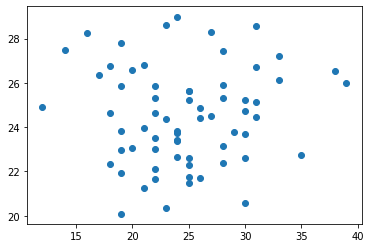

In [112]:
# Creating Bubble Charts
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count,urban_avg_fare)

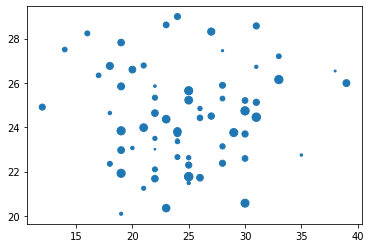

In [113]:
# Build the scatter plotsfor urban cities
plt.scatter(urban_ride_count,urban_avg_fare,s=urban_driver_count)

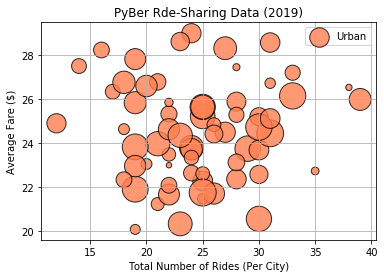

In [114]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count, urban_avg_fare,s=10*urban_driver_count,c='coral',edgecolor='black',linewidths=1,alpha=0.8,label='Urban')
plt.title('PyBer Rde-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add the legend
plt.legend()

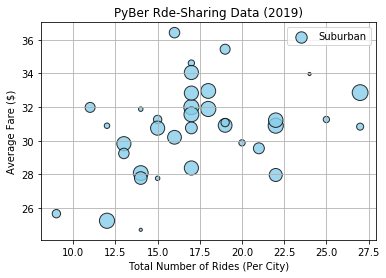

In [115]:
# Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare,s=10*suburban_driver_count,c='skyblue',edgecolor='black',linewidths=1,alpha=0.8,label='Suburban')
plt.title('PyBer Rde-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add the legend
plt.legend()

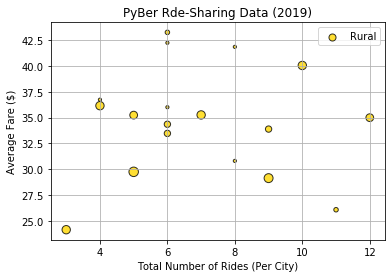

In [116]:
# Build the scatter plots for rural cities
plt.scatter(rural_ride_count, rural_avg_fare,s=10*rural_driver_count,c='gold',edgecolor='black',linewidths=1,alpha=0.8,label='Rural')
plt.title('PyBer Rde-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add the legend
plt.legend()

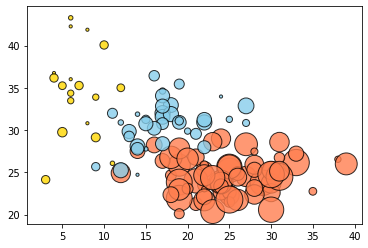

In [117]:
# Add the scatter charts for each type of city
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c='coral',edgecolor='black',linewidths=1,alpha=0.8,label='Urban')
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c='skyblue',edgecolor='black',linewidths=1,alpha=0.8,label='Suburban')
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,c='gold',edgecolor='black',linewidths=1,alpha=0.8,label='Rural')
# Show the Plot
plt.show()

NameError: name 'Analysis' is not defined

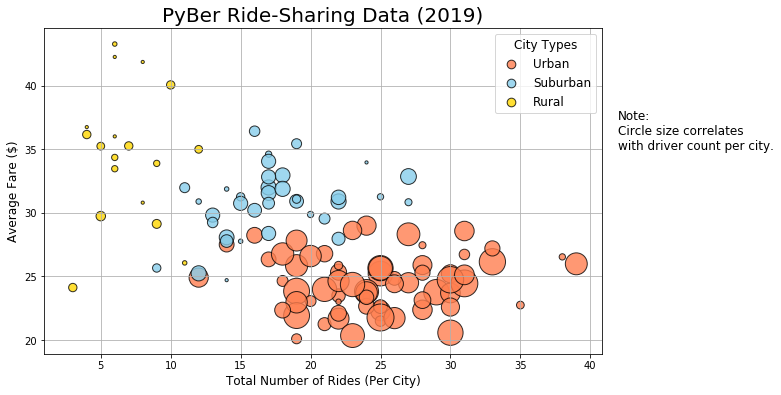

In [123]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c='coral',edgecolor='black',linewidths=1,alpha=0.8,label='Urban')
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c='skyblue',edgecolor='black',linewidths=1,alpha=0.8,label='Suburban')
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,c='gold',edgecolor='black',linewidths=1,alpha=0.8,label='Rural')
# Incorporate the other graph properties
plt.title('PyBer Ride-Sharing Data (2019)',fontsize=20)
plt.ylabel('Average Fare ($)',fontsize=12)
plt.xlabel('Total Number of Rides (Per City)',fontsize=12)
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size
plt.text(42,35,'Note:\nCircle size correlates \nwith driver count per city.',fontsize='12')
# Save the figure
plt.savefig(Analysis/Fig1.png)
# Show the Plot
plt.show()